### Import Required Libraries

In [1]:
# Import necessary libraries
import tensorflow as tf  # Import TensorFlow for building and training neural networks
from tensorflow.keras.models import Model  # Import Model class from Keras for defining custom models
from tensorflow.keras.layers import Input, Dense  # Import Input (for defining input layer) and Dense (for fully connected layers) from Keras
from tensorflow.keras.optimizers import Adam  # Import Adam optimizer for training the model
import numpy as np  # Import NumPy for numerical operations, such as matrix manipulations and array operations
import matplotlib.pyplot as plt  # Import Matplotlib for plotting graphs (used for visualization)


### b. Upload / Access the Dataset

In [2]:
# Load the MNIST dataset
# The dataset consists of handwritten digits (0-9), with 60,000 training and 10,000 testing images.
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train and x_test contain the image data (pixel values), while y_train and y_test contain the corresponding labels (digit labels).

# Normalize the data
# The pixel values of the images range from 0 to 255, so we divide by 255.0 to scale them to a range of 0 to 1.
# This helps the model converge faster and improves training performance.
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape data to be compatible with the neural network (flatten images)
# Each image in the dataset is 28x28 pixels. We need to flatten them into a 1D array (vector) of length 784 (28 * 28).
# This is necessary because neural networks typically require 1D input data (vectors) rather than 2D (matrices).
x_train = x_train.reshape(-1, 28 * 28)  # Reshape training data to 2D (60000, 784)
x_test = x_test.reshape(-1, 28 * 28)    # Reshape test data to 2D (10000, 784)

# Use only "normal" class (e.g., digit "0") for training
# We select only the images that belong to the class "0" (digit "0") for training the autoencoder.
# This is typically done for anomaly detection where we train on normal data and later identify anomalies.
normal_data = x_train[y_train == 0]  # Extract training data where label is '0' (digit 0)


### c. Encoder Converts It into Latent Representation 

In [3]:
# Set the encoding dimension (latent space size)
# This is the size of the "latent space" or the compressed representation of the input data.
# A smaller encoding dimension will result in a more compressed representation of the input, 
# but it may lose more information. Larger encoding dimensions may preserve more details.
encoding_dim = 32  # Latent space will be 32-dimensional

# Define the encoder
# The encoder part of the autoencoder takes the input image (flattened to a 1D vector of 784 elements) 
# and compresses it into a lower-dimensional representation (latent space).
input_img = Input(shape=(28 * 28,))  # Input layer: 784 features (28x28 pixels flattened)

# First dense layer: Reduces the dimensionality to 128 features.
encoded = Dense(128, activation='relu')(input_img)
# 'ReLU' activation function introduces non-linearity, allowing the model to learn complex relationships.

# Second dense layer: Further reduces the dimensionality to 64 features.
encoded = Dense(64, activation='relu')(encoded)

# Third dense layer: Encodes the data into the latent space, 32 features.
encoded = Dense(encoding_dim, activation='relu')(encoded)


### d. Decoder Networks Convert It Back to the Original Input 

In [4]:
# Define the decoder
# The decoder part of the autoencoder takes the latent space representation (compressed data) 
# and reconstructs it back to the original input size, which is the 28x28 image.

# First dense layer of the decoder: Expands the data from the latent space (32 dimensions) back to 64 dimensions.
decoded = Dense(64, activation='relu')(encoded)  
# The ReLU activation is applied to introduce non-linearity, helping the model learn more complex mappings during reconstruction.

# Second dense layer: Expands the data further to 128 dimensions.
decoded = Dense(128, activation='relu')(decoded)  
# Again, ReLU activation helps the model better reconstruct the data by learning non-linear mappings.

# Output layer: Reconstructs the data to the original size of 28x28 (784 values).
decoded = Dense(28 * 28, activation='sigmoid')(decoded)
# The sigmoid activation is used here because pixel values are between 0 and 1 (normalized values).
# Sigmoid ensures that the output values are between 0 and 1, suitable for representing pixel intensities.


### e. Compile the Model with Optimizer, Loss, and Evaluation Metrics 

In [5]:
# Create the Autoencoder model
# The autoencoder is defined as a Keras model that takes the input image and outputs the reconstructed image.
# The model is a combination of the encoder and decoder parts that we have previously defined.
autoencoder = Model(input_img, decoded)

# Compile the Autoencoder
# The model needs to be compiled before it can be trained. We specify the optimizer, loss function, and evaluation metric.

# The optimizer controls the learning process by updating the model weights during training.
# Adam optimizer is used, which is an adaptive learning rate optimizer that generally performs well for most models.
autoencoder.compile(optimizer=Adam(learning_rate=0.001),  # Adam optimizer with a learning rate of 0.001
                    loss='mse',  # Mean squared error (MSE) is used as the loss function since this is a regression task.
                    metrics=['mse'])  # We track the MSE during training as an evaluation metric.

# Train the Autoencoder using only the normal data
# We use the `fit` method to train the autoencoder. The training data is the "normal" data (digit 0), 
# and we use this same data as the target output for the autoencoder. 

history = autoencoder.fit(
    normal_data,  # The input data for training (normal images)
    normal_data,  # The target data for training (the same normal images for reconstruction)
    epochs=20,  # The number of times the entire dataset will be passed through the network
    batch_size=256,  # Number of samples per gradient update
    validation_split=0.2  # 20% of the data will be used for validation during training
)


Epoch 1/20


19/19 [==============================] - 3s 17ms/step - loss: 0.1697 - mse: 0.1697 - val_loss: 0.0769 - val_mse: 0.0769
Epoch 2/20
19/19 [==============================] - 0s 8ms/step - loss: 0.0700 - mse: 0.0700 - val_loss: 0.0650 - val_mse: 0.0650
Epoch 3/20
19/19 [==============================] - 0s 11ms/step - loss: 0.0642 - mse: 0.0642 - val_loss: 0.0609 - val_mse: 0.0609
Epoch 4/20
19/19 [==============================] - 0s 8ms/step - loss: 0.0581 - mse: 0.0581 - val_loss: 0.0520 - val_mse: 0.0520
Epoch 5/20
19/19 [==============================] - 0s 8ms/step - loss: 0.0486 - mse: 0.0486 - val_loss: 0.0443 - val_mse: 0.0443
Epoch 6/20
19/19 [==============================] - 0s 8ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0418 - val_mse: 0.0418
Epoch 7/20
19/19 [==============================] - 0s 8ms/step - loss: 0.0417 - mse: 0.0417 - val_loss: 0.0394 - val_mse: 0.0394
Epoch 8/20
19/19 [==============================] - 0s 7ms/step - loss: 0.0389 - mse: 

In [6]:
# Anomalies
# Calculate reconstruction errors for the test set
# The autoencoder has been trained to reconstruct normal images (e.g., digit "0"). 
# We now use it to reconstruct the images in the test set and measure the reconstruction error.

# Get the reconstructed images for the test set
reconstructed = autoencoder.predict(x_test)

# Calculate Mean Squared Error (MSE) between the original and reconstructed images
# This calculates the reconstruction error for each test sample by measuring the squared difference 
# between the original image and the reconstructed image.
mse = np.mean(np.power(x_test - reconstructed, 2), axis=1)  # Mean squared error along each image

# Define a threshold for anomaly detection
# To detect anomalies, we define a threshold based on the reconstruction error. 
# Any image with a reconstruction error above this threshold will be considered an anomaly.

threshold = np.percentile(mse, 95)  # Set threshold as the 95th percentile of errors on test data
# This means that the top 5% of the samples with the highest reconstruction errors will be considered anomalies.

# Mark samples with high reconstruction errors as anomalies
# Anomalies are those images where the reconstruction error exceeds the defined threshold.
anomalies = mse > threshold

# Print the number of anomalies detected
# This shows how many images in the test set are considered anomalies based on the threshold.
print(f"Number of anomalies detected: {np.sum(anomalies)}")


313/313 [==============================] - 1s 2ms/step
Number of anomalies detected: 500


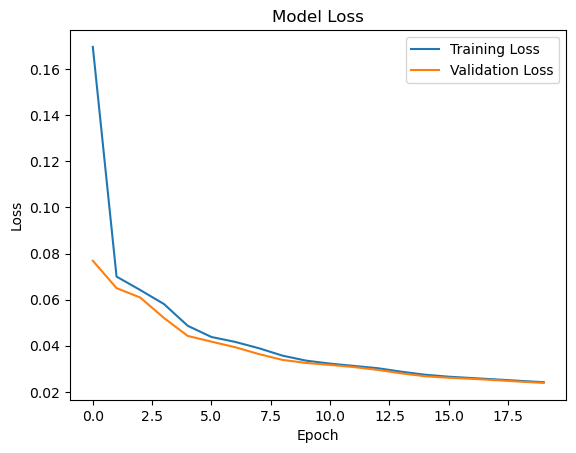

In [7]:
# Plot training & validation loss
# Plot the training loss (from the history object) across epochs
plt.plot(history.history['loss'], label='Training Loss')

# Plot the validation loss (from the history object) across epochs
plt.plot(history.history['val_loss'], label='Validation Loss')

# Set the title of the plot
plt.title('Model Loss')

# Label the x-axis (Epoch number)
plt.xlabel('Epoch')

# Label the y-axis (Loss value)
plt.ylabel('Loss')

# Add a legend to differentiate between training and validation loss
plt.legend()

# Display the plot
plt.show()


In [ ]:
Here are some theoretical questions related to the code you provided, which can be asked by an external examiner:

### **General Autoencoder Questions**:

1. **What is an Autoencoder?**
   - **Answer**: An Autoencoder is a type of neural network that is trained to map input data into a compressed representation (encoding) and then reconstruct it back to the original input using a decoder. It is used for tasks like dimensionality reduction, denoising, anomaly detection, and data compression.

2. **What are the components of an Autoencoder?**
   - **Answer**: An Autoencoder consists of two main parts:
     - **Encoder**: The encoder compresses the input into a latent-space representation.
     - **Decoder**: The decoder reconstructs the original input from the latent representation.

3. **What is the purpose of using an Autoencoder in this task?**
   - **Answer**: In this case, the Autoencoder is used for anomaly detection. By training the Autoencoder on only the "normal" data (digit '0'), the model learns to reconstruct such images well. When presented with anomalous data (e.g., digits other than '0'), it will fail to reconstruct the images accurately, and the reconstruction error can be used to detect anomalies.

4. **What does the `encoding_dim` represent?**
   - **Answer**: The `encoding_dim` represents the size of the latent-space or compressed representation. It determines the capacity of the Autoencoder to capture the most important features of the input data. A smaller encoding dimension forces the model to learn a more compact representation of the data.

5. **What activation function is used in the encoder and why?**
   - **Answer**: The ReLU (Rectified Linear Unit) activation function is used in the encoder. ReLU is commonly used in neural networks because it introduces non-linearity and helps with faster convergence by reducing the vanishing gradient problem.

6. **What is the role of the activation function in the decoder (Sigmoid in this case)?**
   - **Answer**: The Sigmoid activation function is used in the decoder's output layer to map the output to a range between 0 and 1, which is suitable for image data normalized to this range (from 0 to 1). It ensures that the reconstructed images have pixel values between 0 and 1.

### **Training Process and Loss Function Questions**:

7. **What is the significance of Mean Squared Error (MSE) as the loss function?**
   - **Answer**: MSE is used as the loss function because it measures the average squared difference between the original and the reconstructed image. In the case of Autoencoders, we want to minimize the difference between the input and the reconstructed output, making MSE a suitable choice for this task.

8. **Why is the model trained on only the "normal" class (digit "0")?**
   - **Answer**: By training the Autoencoder only on "normal" data, the model learns to effectively reconstruct images of the digit '0'. The reconstruction error will be minimal for normal data, but for other digits (anomalous data), the error will be high, which helps in detecting anomalies.

9. **What does `validation_split=0.2` mean during training?**
   - **Answer**: The `validation_split=0.2` means that 20% of the training data will be set aside as validation data. This validation data is used to evaluate the model's performance during training without being involved in the training process itself. It helps monitor whether the model is overfitting.

10. **How does the `Adam` optimizer work and why is it used in this case?**
    - **Answer**: Adam (Adaptive Moment Estimation) is an optimization algorithm that combines the advantages of two other popular optimizers, AdaGrad and RMSProp. It adapts the learning rate for each parameter based on the estimates of first and second moments of the gradients, which helps in faster convergence and better performance on a variety of tasks. It is used here because of its effectiveness in training deep neural networks.

### **Anomaly Detection Questions**:

11. **How is anomaly detection performed in this code?**
    - **Answer**: Anomaly detection is performed by calculating the reconstruction error for each test image. The reconstruction error is the difference between the original input and the reconstructed output. If the error exceeds a certain threshold (set to the 95th percentile of reconstruction errors), the image is considered anomalous.

12. **What is the rationale behind using the 95th percentile as the threshold for anomaly detection?**
    - **Answer**: Using the 95th percentile of the reconstruction errors ensures that only a small percentage (5%) of the data is considered anomalous. This threshold helps in distinguishing between normal and anomalous data based on how well the model can reconstruct the input.

13. **Why do we expect high reconstruction errors for anomalous data?**
    - **Answer**: The Autoencoder is trained only on normal data (digit '0'). During training, the model learns how to reconstruct normal digit '0' images well. When the model is presented with anomalous data (e.g., other digits), it fails to reconstruct the data accurately, resulting in a high reconstruction error.

14. **What is the significance of marking samples with high reconstruction errors as anomalies?**
    - **Answer**: By marking samples with high reconstruction errors as anomalies, we identify data points that the model is unable to reconstruct well. These data points are likely to be different from the normal class (in this case, digit '0'), and thus are flagged as anomalies.

### **Evaluation and Plotting Questions**:

15. **What is the role of plotting the training and validation loss curves?**
    - **Answer**: Plotting the training and validation loss curves allows us to visually assess the model's learning process. We can check if the model is underfitting (both training and validation loss are high) or overfitting (training loss decreases but validation loss increases). It helps in tuning hyperparameters and understanding model performance.

16. **What does it mean if the validation loss starts increasing while the training loss keeps decreasing?**
    - **Answer**: If the validation loss starts increasing while the training loss decreases, it indicates that the model is overfitting. The model is fitting too much to the training data, memorizing it rather than generalizing well to unseen data.

17. **What would happen if we used a lower or higher value for the encoding dimension (`encoding_dim`)?**
    - **Answer**: If the `encoding_dim` is too small, the Autoencoder might not be able to capture sufficient information about the input data, leading to poor reconstruction and high error. On the other hand, if the `encoding_dim` is too large, the model may overfit, learning to reconstruct the data too perfectly without generalizing well to unseen examples.

### **Miscellaneous Questions**:

18. **What is the difference between an Autoencoder and a Generative Adversarial Network (GAN)?**
    - **Answer**: While both Autoencoders and GANs are used for generating new data (among other tasks), the main difference is that Autoencoders learn to reconstruct inputs by compressing them to a latent representation, while GANs involve two networks (a generator and a discriminator) that compete with each other to generate realistic data.

19. **Why do we use the Mean Squared Error (MSE) instead of other loss functions in Autoencoders?**
    - **Answer**: MSE is commonly used in Autoencoders because it is easy to compute, differentiable, and works well for reconstructing images where the goal is to minimize pixel-wise differences between the original and reconstructed images.

20. **Can this Autoencoder model be used for other types of anomaly detection tasks?**
    - **Answer**: Yes, this Autoencoder model can be used for other anomaly detection tasks where there is a need to detect outliers or anomalous samples in data. It is effective for cases where the model can learn a normal pattern of behavior and flag deviations from this pattern.

These questions cover a broad range of topics, including the Autoencoder architecture, training process, anomaly detection, and evaluation, which are central to understanding the code and its underlying principles.

Here are some additional theoretical questions that an external examiner might ask related to the Autoencoder code:

### **Autoencoder Architecture and Design Questions**:

1. **What are the benefits and drawbacks of using a fully connected (Dense) network in the Autoencoder?**
   - **Answer**: The benefit of using fully connected layers is that they can learn complex, non-linear transformations between the input and output data. However, the drawback is that fully connected networks are computationally expensive and do not exploit spatial relationships in data (e.g., in images, Convolutional Neural Networks are often more efficient).

2. **How does the Autoencoder learn to map input data to the latent space?**
   - **Answer**: The Autoencoder learns to map input data to a lower-dimensional latent space through the encoder network, which applies transformations to compress the input into a compact representation. During training, the model minimizes the reconstruction error between the input and output, thus forcing the encoder to learn an efficient representation of the data.

3. **Why is it important to normalize the data before training the Autoencoder?**
   - **Answer**: Normalizing the data ensures that the input features have a consistent scale (usually between 0 and 1), which can help improve training stability and convergence speed. It also prevents features with larger numerical ranges from dominating the learning process.

4. **How would you modify this Autoencoder to work with different types of input data (e.g., grayscale images, RGB images, or time-series data)?**
   - **Answer**: For grayscale images, the current architecture works well. However, for RGB images, the input size would need to change to account for three color channels, and the encoder/decoder may require modifications (e.g., using convolutional layers instead of dense layers). For time-series data, recurrent layers like LSTMs or GRUs might be more appropriate for learning temporal dependencies.

5. **What are some alternatives to the fully connected Autoencoder for anomaly detection tasks?**
   - **Answer**: Alternatives to the fully connected Autoencoder for anomaly detection tasks include:
     - **Convolutional Autoencoders**: Useful when dealing with images, as they better capture spatial hierarchies and features.
     - **Variational Autoencoders (VAE)**: A generative model that introduces stochasticity into the encoding process, useful for generating new data and detecting anomalies.
     - **Recurrent Autoencoders**: Suitable for time-series data, as they can model sequential patterns.

### **Model Evaluation and Performance Questions**:

6. **How do you evaluate the performance of an Autoencoder in the context of anomaly detection?**
   - **Answer**: The performance can be evaluated using:
     - **Reconstruction error**: Low reconstruction error indicates that the model has learned to capture the patterns in normal data, whereas high error suggests the input is anomalous.
     - **Precision, recall, and F1 score**: If labeled data (with anomalies known) is available, these metrics can be used to measure the model’s ability to correctly identify anomalies.

7. **What are some techniques to improve the performance of the Autoencoder?**
   - **Answer**: Some techniques to improve performance include:
     - **Regularization** (e.g., L1 or L2 regularization) to prevent overfitting.
     - **Dropout** to reduce overfitting and improve generalization.
     - **Data augmentation** to artificially increase the size of the training set and improve model robustness.
     - **Hyperparameter tuning** (e.g., adjusting the number of layers, number of units in each layer, learning rate, etc.).
     - **Using a different optimizer** like RMSprop or SGD.

8. **What would be the impact of using a different loss function (e.g., Mean Absolute Error, Binary Cross-Entropy) for this Autoencoder?**
   - **Answer**: 
     - **Mean Absolute Error (MAE)** would be less sensitive to large errors compared to MSE, which could lead to the model learning a more robust representation but possibly less precise reconstruction.
     - **Binary Cross-Entropy** would be more appropriate if the input data is binary (e.g., black-and-white images), as it measures the difference between the probability distributions of the input and output.
     - Different loss functions affect how the model penalizes reconstruction errors and can influence the training dynamics and the quality of the learned representation.

### **Anomaly Detection and Thresholding Questions**:

9. **Why do you use a fixed threshold (e.g., 95th percentile) for detecting anomalies, and are there any other ways to set the threshold?**
   - **Answer**: A fixed threshold based on a percentile is a simple and effective way to identify outliers, assuming that the majority of the data is normal and the anomalies represent rare occurrences. Other ways to set the threshold include:
     - **Domain-specific thresholds**: If prior knowledge is available, a more context-specific threshold can be set.
     - **Automated methods**: Techniques like clustering (e.g., k-means) or using a validation set to optimize the threshold.
     - **Dynamic thresholds**: Adjusting the threshold dynamically based on the reconstruction error distribution over time or different segments of the dataset.

10. **How does the distribution of the reconstruction error affect anomaly detection?**
    - **Answer**: The reconstruction error distribution typically follows a normal or Gaussian distribution for "normal" data. Anomalous data points will have higher reconstruction errors that fall outside the expected distribution. Anomalies can be detected by setting a threshold based on the tail of the distribution (e.g., 95th percentile or other statistical techniques like z-scores).

### **Optimization and Hyperparameter Tuning Questions**:

11. **How does the choice of optimizer affect the training of the Autoencoder?**
    - **Answer**: The optimizer determines how the weights in the network are updated during training. For example:
      - **Adam**: Often works well for most neural networks due to its adaptive learning rates.
      - **SGD (Stochastic Gradient Descent)**: May require careful tuning of the learning rate and momentum, but it can sometimes perform better on large datasets.
      - **RMSprop**: Often works well for recurrent networks or in cases where the learning rate varies across parameters.
    
    The optimizer’s effectiveness depends on the model’s architecture and the specific task.

12. **What would happen if you used a higher or lower learning rate for the Adam optimizer?**
    - **Answer**: A **higher learning rate** might cause the model to converge too quickly and potentially miss the optimal solution (or even diverge), while a **lower learning rate** might result in slower convergence and potentially get stuck in local minima. Tuning the learning rate is crucial for ensuring stable and efficient training.

13. **How would you adjust the Autoencoder’s architecture for a larger dataset?**
    - **Answer**: For a larger dataset, you might consider:
      - **Increasing the capacity** of the model (e.g., adding more layers or units in the encoder/decoder).
      - **Training with a larger batch size** to improve generalization and reduce variance in gradient estimates.
      - **Using early stopping** to prevent overfitting.
      - **Distributed training** using multiple GPUs or parallelism to speed up training for large datasets.

### **Advanced Topics Questions**:

14. **What is the difference between a deterministic and a probabilistic Autoencoder?**
    - **Answer**: A **deterministic Autoencoder** (like the one in the code) maps input data to a single fixed latent representation. In contrast, a **probabilistic Autoencoder**, such as a Variational Autoencoder (VAE), uses probability distributions to represent the latent space. This allows the model to generate new, realistic data by sampling from the learned distribution.

15. **How would you modify this model to use it for generating new data (e.g., digit generation)?**
    - **Answer**: To generate new data, the decoder part of the Autoencoder would need to take a random vector from the latent space (instead of a reconstruction of an image) and output a new image. Variational Autoencoders (VAE) are often used for such tasks, as they are designed to learn a continuous latent space and can sample from it to generate new data.

16. **Can Autoencoders be used for classification tasks?**
    - **Answer**: While Autoencoders are typically used for unsupervised learning tasks like anomaly detection, they can be adapted for classification tasks. By adding a classification layer (e.g., softmax or sigmoid) on top of the encoder's output, the Autoencoder can be trained for supervised learning.

These additional questions dive deeper into the architecture, optimization, anomaly detection methodology, and potential modifications of Autoencoders, helping to assess the student’s understanding of both theoretical concepts and practical applications.